# DAT Final Project

## Propsal + Dataset

**Background**: Historically we have seen very high correlations between search volume and business KPIs. Search data is currently being used across Media & Entertainment to help inform and predict the sales of video games, event tickets, and movie box-office.


**Problem:** Television ratings have been on the decline for nearly a decade and TV companies like Disney, NBC Universal, ViacomCBS, Discovery, etc. are looking for earlier indicators to understand if their next new TV show will meeting their ratings goals & decide how to allocate marketing budgets

**Hypothesis**: Google Search is the world's best measure of interest and intent and can be a strong predictor of how well a TV show will premiere

**Goal**: To understand the relationship between Google Search data and TV shows then determine if Google Search data is a strong predictor of TV Viewership

**Success Metrics**: Model Accuracy

**Risks/Limitations**:
- The target metrics is a calculation based on reach & engagement; therefore, shows that have low engagement will have lower ratings even if reach is held equal. There is no way to quanitfy how engaging (good/bad) a TV show is before it premieres
- I am working with a small data set, which is specifically for Viacom. It will likely not genrealize well for Viacom specifically or outside of Viacom shows.

## Import Packages 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,6)})

## Import, Clean & Check Data 

In [3]:
meta = pd.read_excel('search_show_list.xlsx', sheet_name=0)
search = pd.read_csv('Viacom Search Corr_20200221100829.csv')

In [4]:
#Force columns to lowercase and replace spaces w/ underscores
to_repalce = ',.+'

for i in to_repalce:
    meta.columns = meta.columns.str.lower().str.replace(" ","_").str.replace(i,"")
    search.columns = search.columns.str.lower().str.replace(" ","_").str.replace(i,"")

In [5]:
meta.head()

,network,show,id,nielsen_name,season,premiere,type,start_time,episode_duration,genre,reach_18-49_lsd,reach_p2_lsd,reach_p18-49_l3,reach_p2_l3,avg_audience_18-49_lsd,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3
0,CMT,CMT Artists of the Year,_CMTArtistsoftheYear_s2019,CMT ARTISTS OF YEAR 2019,2019,2019-10-07,Tentpole,08:00P,103,NaN,290,1120,321,1216,84,347,105,403
1,CMT,CMT Music Awards,_CMTMusicAwards_s2019,CMT MUSIC AWARDS,2019,2019-06-06,Tentpole,08:00P,149,NaN,764,2668,842,2906,313,1037,351,1184
2,CMT,Dallas Cowboys Cheerleaders Making the Team,_DallasCowboysCheerleadersMakingtheTeam_s14,DALLAS COWBOYS CHRLDRS 14,S14,2019-08-03,Returning,09:00P,60,NaN,2079,6098,2380,6753,147,344,308,668
3,CMT,Nashville Squares,_NashvilleSquares_s1,NASHVILLE SQUARES,S1,2019-11-02,New,08:00P,30,NaN,648,2913,666,3062,50,223,58,266
4,CMT,Racing Wives,_RacingWives_s1,RACING WIVES,S1,2019-08-03,New,10:00P,60,NaN,1164,3167,1471,3806,58,144,123,262


In [6]:
meta.shape

(41, 18)

In [7]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   network                 41 non-null     object        
 1   show                    41 non-null     object        
 2   id                      41 non-null     object        
 3   nielsen_name            41 non-null     object        
 4   season                  41 non-null     object        
 5   premiere                41 non-null     datetime64[ns]
 6   type                    41 non-null     object        
 7   start_time              41 non-null     object        
 8   episode_duration        41 non-null     int64         
 9   genre                   0 non-null      float64       
 10  reach_18-49_lsd         41 non-null     int64         
 11  reach_p2_lsd            41 non-null     int64         
 12  reach_p18-49_l3         41 non-null     int64       

In [8]:
meta.set_index('id', inplace=True)

In [9]:
search.head()

,id,release_date,stat_date,days_from_release,index_queries
0,_TI&TinyFriendsandFamilyHustle_s2,2019-04-16,2019-03-16,-31,0.024167
1,_TI&TinyFriendsandFamilyHustle_s2,2019-04-16,2019-03-17,-30,0.026367
2,_RacingWives_s1,2019-08-03,2019-08-01,-2,0.366667
3,_Love&HipHopAtlanta_s8,2019-03-26,2019-02-19,-35,0.051533
4,_TI&TinyFriendsandFamilyHustle_s2,2019-04-16,2019-02-23,-52,0.054900


In [10]:
search.shape

(2350, 5)

In [11]:
search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2350 non-null   object 
 1   release_date       2350 non-null   object 
 2   stat_date          2350 non-null   object 
 3   days_from_release  2350 non-null   int64  
 4   index_queries      2350 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 91.9+ KB


In [12]:
# Convert columns to datetime
search.release_date = pd.to_datetime(search.release_date)
search.stat_date = pd.to_datetime(search.stat_date)

In [13]:
# Check for missing stat_date
pd.date_range(start = '2018-11-09', end = '2019-12-18' ).difference(search.stat_date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [14]:
# Check for Missing Dates -- each entry should have 62
record_count = pd.DataFrame(search.groupby(['id', 'release_date']).days_from_release.count()).sort_values(by='release_date')
record_count

,,days_from_release
id,release_date,
_Ridiculousness_s16,2019-01-06,62
_Love&HipHopMiami_s3,2019-01-06,62
_SiestaKey_s3,2019-01-07,62
_Catfish_s8A,2019-01-08,62
_LindsayLohansBeachClub_s1,2019-01-08,62
_TrueLifeCrime_s1,2019-01-08,31
_MadeinStatenIsland_s1,2019-01-14,60
_RuPaul'sDragRace_s11,2019-02-21,62
_GameofClones_s1,2019-02-21,62


In [15]:
# Which shows have missing data
record_count[record_count.days_from_release < 62]

,,days_from_release
id,release_date,
_TrueLifeCrime_s1,2019-01-08,31
_MadeinStatenIsland_s1,2019-01-14,60
_Love&Listings_s1,2019-07-30,48
_DallasCowboysCheerleadersMakingtheTeam_s14,2019-08-03,48
_BlackInkCrewCompton_s1,2019-08-15,58
_GhostedLoveGoneMissing_s1,2019-09-11,23
_CMTArtistsoftheYear_s2019,2019-10-07,48
_NashvilleSquares_s1,2019-11-02,24
_ExontheBeachPeakofLove_s1,2019-12-06,26


In [16]:
# QA Each missing data set
search[search.id == '_ExontheBeachPeakofLove_s1'].sort_values(by='days_from_release')

,id,release_date,stat_date,days_from_release,index_queries
2293,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-12,-24,0.003900
1642,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-13,-23,0.004933
1901,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-14,-22,0.011300
2342,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-15,-21,0.037100
1909,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-16,-20,0.041367
1978,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-17,-19,0.037100
1987,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-18,-18,0.022633
905,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-19,-17,0.025000
2248,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-20,-16,0.056900
2146,_ExontheBeachPeakofLove_s1,2019-12-06,2019-11-21,-15,0.077333


In [17]:
# Grab list of missing data for SQL Script
[x for x in record_count[record_count.days_from_release < 62].reset_index().id]

['_TrueLifeCrime_s1',
 '_MadeinStatenIsland_s1',
 '_Love&Listings_s1',
 '_DallasCowboysCheerleadersMakingtheTeam_s14',
 '_BlackInkCrewCompton_s1',
 '_GhostedLoveGoneMissing_s1',
 '_CMTArtistsoftheYear_s2019',
 '_NashvilleSquares_s1',
 '_ExontheBeachPeakofLove_s1']

## Merge metadata with with search data

In [18]:
# Create flexible date ranges for buckets
ranges = [[-42,1],     # Premiere Day
          [-42,0],    # 1 Week out
          [-42,-7],  #2 Weeks out
          [-42,-14], #3 Weeks out
          [-42,-21], #4 Weeks out
          [-42,-28], #5 Weeks out
          [-42,-35], #6 Weeks out
         ]

In [19]:
a_list = []

for i in range(len(ranges)):
    a = search[(search.days_from_release >= ranges[i][0]) & (search.days_from_release < ranges[i][1])].groupby('id').index_queries.sum()
    a_list.append(a)

In [20]:
ranges

[[-42, 1], [-42, 0], [-42, -7], [-42, -14], [-42, -21], [-42, -28], [-42, -35]]

In [21]:
col_names = []
for i in range(len(a_list)):
    col_names.append('to_day'+str(ranges[i][1]))

In [22]:
search_trans = pd.DataFrame(a_list).transpose()
search_trans.columns = col_names
search_trans

,to_day1,to_day0,to_day-7,to_day-14,to_day-21,to_day-28,to_day-35
_AreYouTheOne_s8,5.583333,4.756667,2.825967,1.990167,1.456167,0.712000,0.331800
_BasketballWives_s8A,5.099333,4.572267,2.007133,1.384967,0.869667,0.439533,0.191267
_BlackInkCrewChicago_s6A,1.054567,0.936233,0.557867,0.425067,0.294500,0.182033,0.097000
_BlackInkCrewCompton_s1,1.508467,1.311167,0.656967,0.397433,0.265600,0.156367,0.073767
_BlackInkCrewNY_s8A,0.031567,0.029367,0.017267,0.012800,0.008167,0.004667,0.002067
_CMTArtistsoftheYear_s2019,0.011700,0.011033,0.007633,0.005667,0.001200,0.000767,0.000367
_CMTMusicAwards_s2019,1.272967,1.049800,0.143600,0.084700,0.063567,0.038433,0.011333
_CartelCrew_s2,4.122067,3.768433,2.040767,1.189967,0.707367,0.431733,0.162000
_Catfish_s8A,10.077100,9.858800,7.950267,6.377533,4.997633,3.493900,1.864533
_DallasCowboysCheerleadersMakingtheTeam_s14,0.011433,0.009367,0.002700,0.001600,0.000700,0.000633,0.000433


In [23]:
df = meta.merge(search_trans, how='outer', left_index=True, right_index=True)

In [24]:
df.head()

,network,show,nielsen_name,season,premiere,type,start_time,episode_duration,genre,reach_18-49_lsd,...,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3,to_day1,to_day0,to_day-7,to_day-14,to_day-21,to_day-28,to_day-35
_AreYouTheOne_s8,MTV,Are You The One,ARE YOU THE ONE SSN 8,S8,2019-06-27,Returning,09:00P,61,NaN,3559,...,319,495,679,5.583333,4.756667,2.825967,1.990167,1.456167,0.712000,0.331800
_BasketballWives_s8A,VH1,Basketball Wives,BASKETBALL WIVES 8,S8A,2019-06-20,Returning,08:00P,61,NaN,5445,...,1099,1004,1708,5.099333,4.572267,2.007133,1.384967,0.869667,0.439533,0.191267
_BlackInkCrewChicago_s6A,VH1,Black Ink Crew Chicago,BLACK INK CREW CHICAGO 6,S6A,2019-12-05,Returning,08:00P,60,NaN,1899,...,664,584,950,1.054567,0.936233,0.557867,0.425067,0.294500,0.182033,0.097000
_BlackInkCrewCompton_s1,VH1,Black Ink Crew Compton,BLACK INK CREW COMPTON,S1,2019-08-15,New,10:00P,50,NaN,3013,...,707,598,967,1.508467,1.311167,0.656967,0.397433,0.265600,0.156367,0.073767
_BlackInkCrewNY_s8A,VH1,Black Ink Crew NY,BLACK INK CREW 8,S8A,2019-08-15,Returning,09:00P,60,NaN,4301,...,909,841,1326,0.031567,0.029367,0.017267,0.012800,0.008167,0.004667,0.002067


In [25]:
df.shape

(41, 24)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, _AreYouTheOne_s8 to _WildNOut_s13
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   network                 41 non-null     object        
 1   show                    41 non-null     object        
 2   nielsen_name            41 non-null     object        
 3   season                  41 non-null     object        
 4   premiere                41 non-null     datetime64[ns]
 5   type                    41 non-null     object        
 6   start_time              41 non-null     object        
 7   episode_duration        41 non-null     int64         
 8   genre                   0 non-null      float64       
 9   reach_18-49_lsd         41 non-null     int64         
 10  reach_p2_lsd            41 non-null     int64         
 11  reach_p18-49_l3         41 non-null     int64         
 12  reach_p2_l3             41 non-

## EDA 

#### What Nielsen TV Metrics has the strongest relationship with Search Data?
- Hypothesis is that it that Reach will have the strongest relationship with Search Data; however, considering the indsutry trades on Avg. Audience (which is a combination of Reach & Engagement with a TV show), we hope that there is a also a strong relationship there as well 

In [ ]:
# sns.pairplot(data=df, vars=['reach_18-49_lsd','reach_p2_lsd', 'reach_p18-49_l3', 'reach_p2_l3',
#        'avg_audience_18-49_lsd', 'avg_audience_p2_lsd',
#        'avg_audience_18-49_l3', 'avg_audience_p2_l3', 'to_day0', 'to_day-7',
#        'to_day-14', 'to_day-21', 'to_day-28', 'to_day-35', 'to_day-42'])

In [ ]:
# sns.pairplot(data=df, x_vars=['reach_18-49_lsd','reach_p2_lsd', 'reach_p18-49_l3', 'reach_p2_l3',
#        'avg_audience_18-49_lsd', 'avg_audience_p2_lsd',
#        'avg_audience_18-49_l3', 'avg_audience_p2_l3'], y_vars=['to_day0', 'to_day-7',
#        'to_day-14', 'to_day-21', 'to_day-28', 'to_day-35', 'to_day-42'])

In [26]:
df.corr()[['reach_18-49_lsd', 'reach_p2_lsd', 'reach_p18-49_l3', 'reach_p2_l3',
       'avg_audience_18-49_lsd', 'avg_audience_p2_lsd', 'avg_audience_18-49_l3', 'avg_audience_p2_l3']]

,reach_18-49_lsd,reach_p2_lsd,reach_p18-49_l3,reach_p2_l3,avg_audience_18-49_lsd,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3
episode_duration,-0.237863,-0.247369,-0.207675,-0.221142,0.330332,0.422264,0.191111,0.310713
genre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reach_18-49_lsd,1.000000,0.971646,0.983842,0.986324,0.554572,0.456543,0.672112,0.606478
reach_p2_lsd,0.971646,1.000000,0.927942,0.986696,0.483140,0.415625,0.574809,0.538930
reach_p18-49_l3,0.983842,0.927942,1.000000,0.970986,0.550783,0.440393,0.696225,0.615571
reach_p2_l3,0.986324,0.986696,0.970986,1.000000,0.510901,0.429115,0.630284,0.579846
avg_audience_18-49_lsd,0.554572,0.483140,0.550783,0.510901,1.000000,0.955990,0.928895,0.958228
avg_audience_p2_lsd,0.456543,0.415625,0.440393,0.429115,0.955990,1.000000,0.827757,0.935111
avg_audience_18-49_l3,0.672112,0.574809,0.696225,0.630284,0.928895,0.827757,1.000000,0.961500
avg_audience_p2_l3,0.606478,0.538930,0.615571,0.579846,0.958228,0.935111,0.961500,1.000000


In [29]:
df.corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3']

,reach_18-49_lsd,reach_p2_lsd,reach_p18-49_l3,reach_p2_l3,avg_audience_18-49_lsd,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3
to_day0,0.352210,0.295643,0.398456,0.346414,0.112965,0.035445,0.207452,0.134459
to_day-7,0.367725,0.314638,0.403050,0.355386,0.052397,-0.027703,0.170830,0.088292
to_day-14,0.364002,0.311054,0.398465,0.350933,0.050103,-0.026951,0.167007,0.086984
to_day-21,0.348949,0.296932,0.384339,0.336921,0.038377,-0.035866,0.149786,0.072545
to_day-28,0.322678,0.274008,0.357207,0.312745,0.013028,-0.059201,0.126630,0.049428
to_day-35,0.330666,0.280237,0.361685,0.316291,-0.011103,-0.085218,0.121309,0.038291


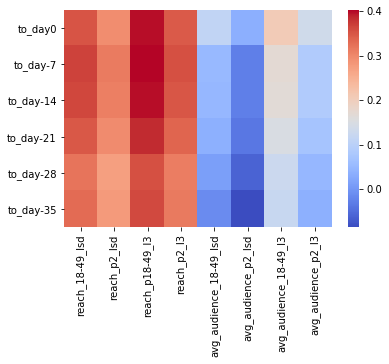

In [68]:
sns.heatmap(df.corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'], cmap='coolwarm');

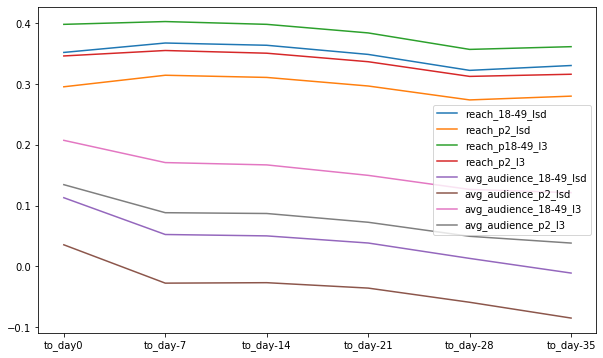

In [69]:
df.corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'].plot(figsize=(10,6));

#### Result
- Overall, Reach P18-49 L+3 has the strongest realtionship between with Search
- All Reach related metrics showed a stronger correlation than any of the Avg. Audience metrics
- However, AA P18-49 L+3 had the strongest relationship for an Avg. Audience Metrics, indicating that Search Data is more likely to relate to the 18-49 audiencethan p2+

#### Other Thoughts
- the relationship between search and the metrics seems to remaind realively constant from -14 to 0, meaning that we may be able to make meaningful predictions two weeks out

#### The correlations still seem relatively low. What does the relationship between Reach18-49 L+3 and Search Volume and does it tell us anything? 

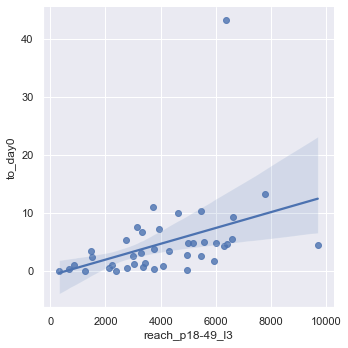

In [139]:
sns.lmplot(x='reach_p18-49_l3', y='to_day0', data=df);

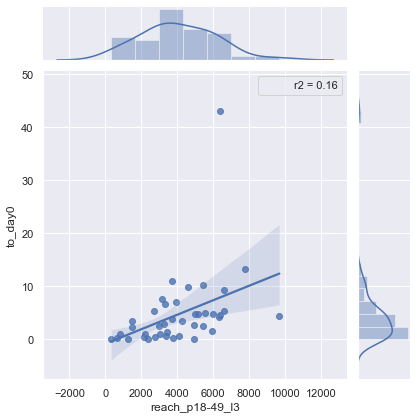

In [142]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
sns.jointplot(df['reach_p18-49_l3'], df['to_day0'], kind="reg", stat_func=r2);

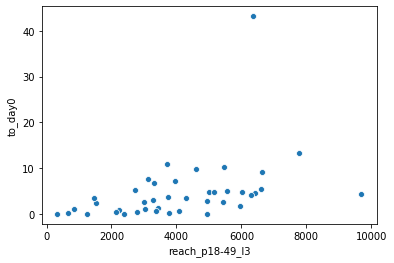

In [32]:
sns.scatterplot(x='reach_p18-49_l3', y='to_day0', data=df)

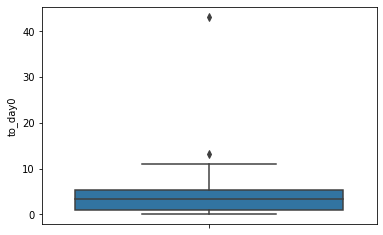

In [54]:
sns.boxplot(y=df.to_day0)

In [48]:
df.to_day0.sort_values(ascending=False)[:5]

_LindsayLohansBeachClub_s1        43.160400
_TeenMom_s8                       13.289400
_VideoMusicAwards_s2019           10.970867
_JerseyShoreFamilyVacation_s3A    10.245933
_Catfish_s8A                       9.858800
Name: to_day0, dtype: float64

#### Results
- Lindsay Lohan Beach Club appears to be a huge outlier
- Teen Mom S8 Might be another outlier

#### If we remove outliers from the dataset how much stronger is our relationship?

In [63]:
df[df.index != '_LindsayLohansBeachClub_s1']\
    .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3']

,reach_18-49_lsd,reach_p2_lsd,reach_p18-49_l3,reach_p2_l3,avg_audience_18-49_lsd,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3
to_day0,0.450631,0.365222,0.509603,0.432188,0.388237,0.267779,0.511247,0.415377
to_day-7,0.473331,0.396804,0.508826,0.442020,0.254462,0.131199,0.423717,0.310340
to_day-14,0.465722,0.389499,0.499418,0.432911,0.249818,0.132734,0.415997,0.307700
to_day-21,0.449143,0.373389,0.484550,0.417335,0.242660,0.130120,0.402213,0.299221
to_day-28,0.403029,0.335860,0.434228,0.375731,0.217537,0.106982,0.380131,0.278253
to_day-35,0.382924,0.318587,0.405599,0.350506,0.140879,0.037565,0.323393,0.219846


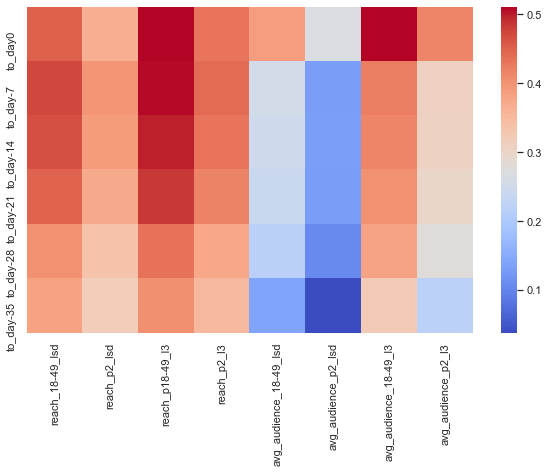

In [76]:
sns.heatmap(df[df.index != '_LindsayLohansBeachClub_s1']\
            .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'],\
           cmap='coolwarm');

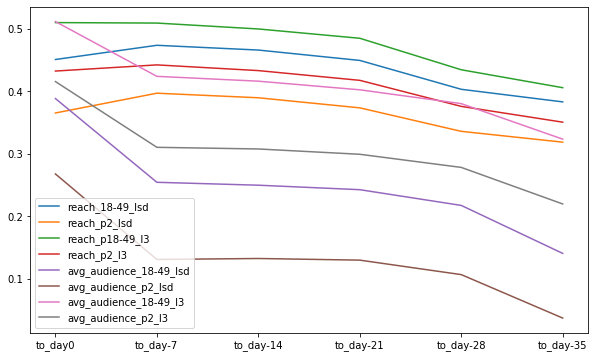

In [71]:
df[df.index != '_LindsayLohansBeachClub_s1']\
    .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'].plot(figsize=(10,6));

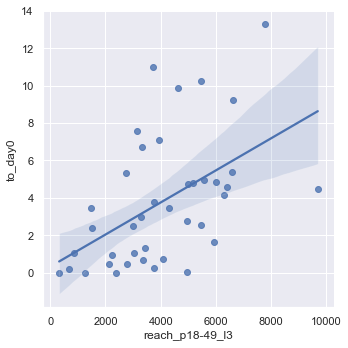

In [136]:
sns.lmplot(x='reach_p18-49_l3', y='to_day0', data=df[df.index != '_LindsayLohansBeachClub_s1']);

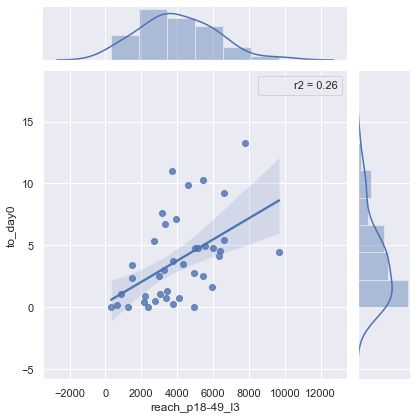

In [146]:
sns.jointplot(data=df[~df.index.isin(['_LindsayLohansBeachClub_s1'])],\
              x='reach_p18-49_l3', y='to_day0', kind="reg", stat_func=r2);

In [80]:
df[df.index != '_LindsayLohansBeachClub_s1'].corr().loc['to_day0':'to_day-35','reach_p18-49_l3']

to_day0      0.509603
to_day-7     0.508826
to_day-14    0.499418
to_day-21    0.484550
to_day-28    0.434228
to_day-35    0.405599
Name: reach_p18-49_l3, dtype: float64

In [81]:
df.corr().loc['to_day0':'to_day-35','reach_p18-49_l3']

to_day0      0.398456
to_day-7     0.403050
to_day-14    0.398465
to_day-21    0.384339
to_day-28    0.357207
to_day-35    0.361685
Name: reach_p18-49_l3, dtype: float64

In [121]:
pd.DataFrame(zip(df[df.index != '_LindsayLohansBeachClub_s1'].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'],\
   df.corr().loc['to_day0':'to_day-35','reach_p18-49_l3']), columns=['No Outliers','w/ Outliers'])

,No Outliers,w/ Outliers
0,0.509603,0.398456
1,0.508826,0.403050
2,0.499418,0.398465
3,0.484550,0.384339
4,0.434228,0.357207
5,0.405599,0.361685


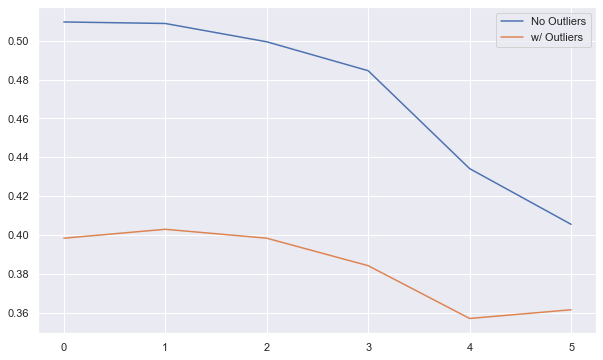

In [120]:
pd.DataFrame(zip(df[df.index != '_LindsayLohansBeachClub_s1'].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'],\
   df.corr().loc['to_day0':'to_day-35','reach_p18-49_l3']), columns=['No Outliers','w/ Outliers']).plot();

#### Result
- Removing Lohand Beach Club improves the realtionship significantly. 

#### What about removing Teen Mom, which is close to being an outlier

In [106]:
df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])].shape

(39, 24)

In [109]:
df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])]\
    .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3']

,reach_18-49_lsd,reach_p2_lsd,reach_p18-49_l3,reach_p2_l3,avg_audience_18-49_lsd,avg_audience_p2_lsd,avg_audience_18-49_l3,avg_audience_p2_l3
to_day0,0.400654,0.337620,0.440802,0.384130,0.392046,0.277674,0.468771,0.382375
to_day-7,0.429557,0.383420,0.432672,0.397244,0.249533,0.128755,0.365282,0.259604
to_day-14,0.421326,0.376720,0.420400,0.386926,0.245555,0.131574,0.355906,0.256377
to_day-21,0.402343,0.359996,0.401445,0.369070,0.240223,0.131891,0.339498,0.247045
to_day-28,0.343054,0.312754,0.336230,0.316992,0.211078,0.107598,0.311514,0.223188
to_day-35,0.318573,0.289809,0.303552,0.286480,0.117499,0.023657,0.243116,0.153506


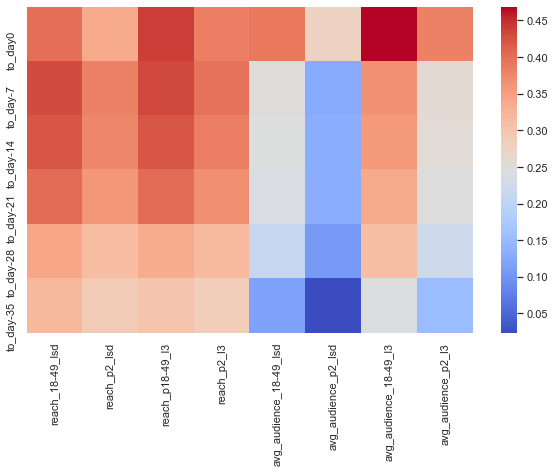

In [111]:
sns.heatmap(df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])]\
            .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'],\
           cmap='coolwarm');

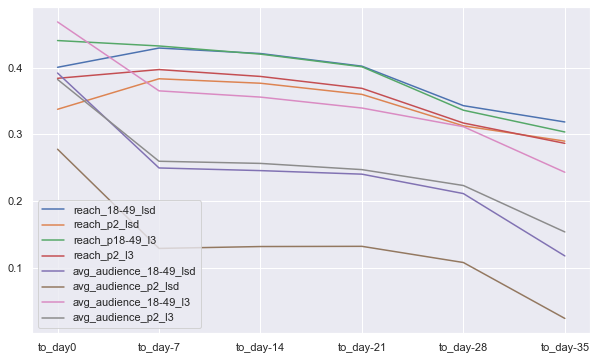

In [113]:
df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])]\
    .corr().loc['to_day0':'to_day-35','reach_18-49_lsd':'avg_audience_p2_l3'].plot(figsize=(10,6));

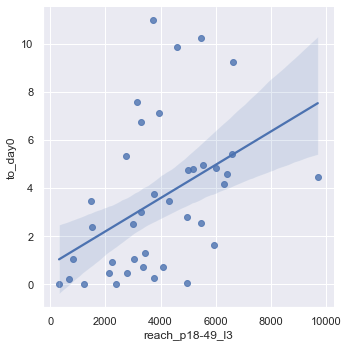

In [137]:
sns.lmplot(x='reach_p18-49_l3', y='to_day0', data=df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])]);

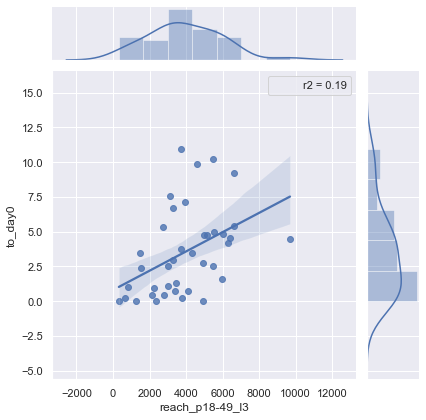

In [144]:
sns.jointplot(data=df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])],\
              x='reach_p18-49_l3', y='to_day0', kind="reg", stat_func=r2)

In [125]:
a = df.corr().loc['to_day0':'to_day-35','reach_p18-49_l3']
a

to_day0      0.398456
to_day-7     0.403050
to_day-14    0.398465
to_day-21    0.384339
to_day-28    0.357207
to_day-35    0.361685
Name: reach_p18-49_l3, dtype: float64

In [126]:
b =df[df.index != '_LindsayLohansBeachClub_s1'].corr().loc['to_day0':'to_day-35','reach_p18-49_l3']
b

to_day0      0.509603
to_day-7     0.508826
to_day-14    0.499418
to_day-21    0.484550
to_day-28    0.434228
to_day-35    0.405599
Name: reach_p18-49_l3, dtype: float64

In [127]:
c =df[~df.index.isin(['_LindsayLohansBeachClub_s1','_TeenMom_s8'])].corr().loc['to_day0':'to_day-35','reach_p18-49_l3']
c

to_day0      0.440802
to_day-7     0.432672
to_day-14    0.420400
to_day-21    0.401445
to_day-28    0.336230
to_day-35    0.303552
Name: reach_p18-49_l3, dtype: float64

In [149]:
c.index

Index(['to_day0', 'to_day-7', 'to_day-14', 'to_day-21', 'to_day-28',
       'to_day-35'],
      dtype='object')

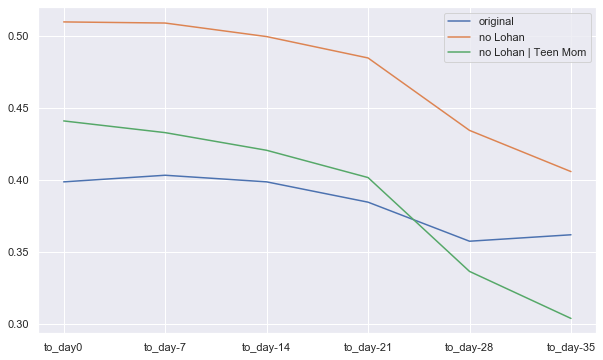

In [151]:
pd.DataFrame(zip(a,b,c), columns=['original','no Lohan','no Lohan | Teen Mom'], index=c.index).plot();

#### Result
- Removing *Only Lohan* rather than Lohan + Teen Mom results in the strongest realtionship. I'm comfortable leaving Teen Mom in because it's so clost to not being considered an outlier
- Moving forward, we will use the data set excluding *Lohan Beach Club*
- Also, removing Lohan Beach Club increase the relationship between Avg. Audience and Search for 18-49 L3 signficinatly.

### Are there any interesting Dimensions?

In [29]:
# Make a new dataframe with the data we want to use based on previous EDA
vdf = df.loc[~df.index.isin(['_LindsayLohansBeachClub_s1']), ['network', 'show', 'nielsen_name', 'season', 'premiere', 'type',
       'start_time', 'episode_duration', 'genre', 'reach_p18-49_l3','avg_audience_18-49_l3','to_day1', 'to_day0',
       'to_day-7', 'to_day-14', 'to_day-21', 'to_day-28', 'to_day-35']]

In [30]:
vdf.columns

Index(['network', 'show', 'nielsen_name', 'season', 'premiere', 'type',
       'start_time', 'episode_duration', 'genre', 'reach_p18-49_l3',
       'avg_audience_18-49_l3', 'to_day1', 'to_day0', 'to_day-7', 'to_day-14',
       'to_day-21', 'to_day-28', 'to_day-35'],
      dtype='object')

In [31]:
vdf.shape

(40, 18)

In [32]:
vdf.describe(include='all').transpose()

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
network,40,3,MTV,20,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
show,40,40,Racing Wives,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nielsen_name,40,40,MADE IN STATEN ISLAND,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,40,17,S1,12,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
premiere,40,34,2019-09-11 00:00:00,2,2019-01-06,2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,40,3,Returning,25,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_time,40,5,08:00P,18,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
episode_duration,40,NaN,NaN,NaN,NaT,NaT,66.125,28.5668,30,60,61,61,178
genre,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reach_p18-49_l3,40,NaN,NaN,NaN,NaT,NaT,4024.1,2039.92,321,2766.5,3757,5452.5,9693


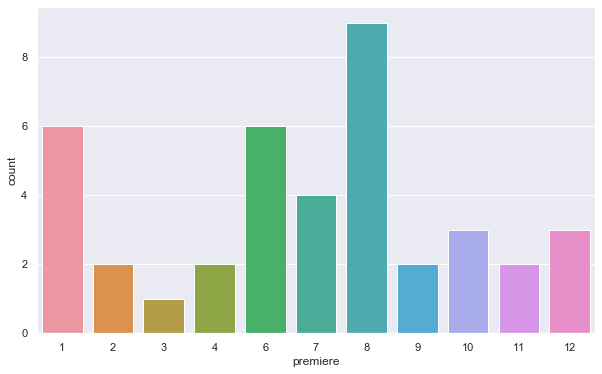

In [199]:
sns.countplot(x=vdf.premiere.dt.month);

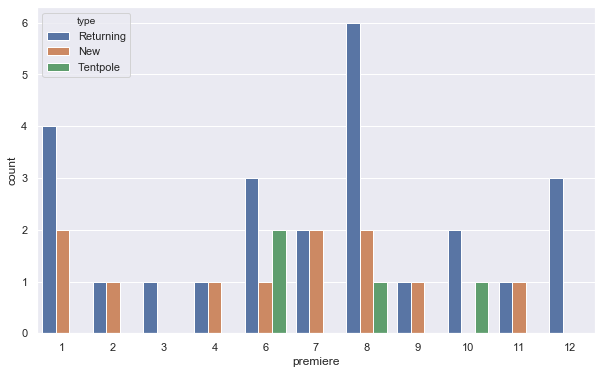

In [205]:
sns.countplot(x=vdf.premiere.dt.month, hue=vdf.type);

#### Do any Networks have a higher correlation?

In [167]:
vdf.network.value_counts()

MTV    20
VH1    15
CMT     5
Name: network, dtype: int64

In [245]:
for t in vdf.network.unique():
    print(t)
    print(vdf[vdf.network == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    print("")

MTV
to_day0      0.600610
to_day-7     0.628925
to_day-14    0.621015
to_day-21    0.611643
to_day-28    0.586000
to_day-35    0.554133
Name: reach_p18-49_l3, dtype: float64

VH1
to_day0      0.417724
to_day-7     0.324089
to_day-14    0.300119
to_day-21    0.235835
to_day-28    0.123238
to_day-35    0.087092
Name: reach_p18-49_l3, dtype: float64

CMT
to_day0      0.158227
to_day-7     0.211154
to_day-14    0.208815
to_day-21    0.124963
to_day-28   -0.177445
to_day-35   -0.067955
Name: reach_p18-49_l3, dtype: float64



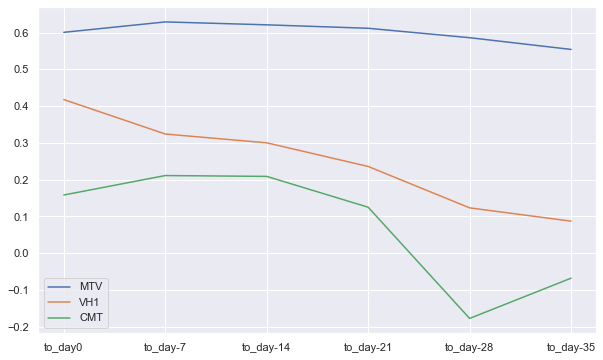

In [244]:
corr_list = []
for t in vdf.network.unique():
    corr_list.append(vdf[vdf.network == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    
pd.DataFrame(corr_list, index=vdf.network.unique()).transpose().plot();

#### Result
- All show a growing correlation overtime, but given the small sample size it's hard to draw any concerete conclusions

#### Do New/Returning shows have a higher correlation?

In [169]:
vdf.type.value_counts()

Returning    25
New          11
Tentpole      4
Name: type, dtype: int64

In [224]:
for t in vdf.type.unique():
    print(t)
    print(vdf[vdf.type == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    print("")

Returning
to_day0      0.410263
to_day-7     0.388928
to_day-14    0.392247
to_day-21    0.372651
to_day-28    0.309739
to_day-35    0.294345
Name: reach_p18-49_l3, dtype: float64

New
to_day0      0.693602
to_day-7     0.558371
to_day-14    0.521915
to_day-21    0.680383
to_day-28    0.875909
to_day-35    0.793793
Name: reach_p18-49_l3, dtype: float64

Tentpole
to_day0      0.990717
to_day-7     0.983080
to_day-14    0.985189
to_day-21    0.983514
to_day-28    0.983248
to_day-35    0.998972
Name: reach_p18-49_l3, dtype: float64



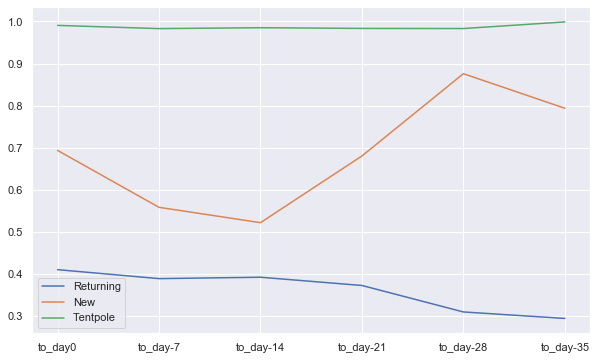

In [240]:
corr_list = []
for t in vdf.type.unique():
    corr_list.append(vdf[vdf.type == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    
pd.DataFrame(corr_list, index=vdf.type.unique()).transpose().plot();

#### Result: 
- Given the small sample size of New (11) and Tentpole (3) I think there is a lot of noise and it's hard to draw a definitive conclusions

#### Does starttime have a higher correlation?

In [170]:
vdf.start_time.value_counts()

08:00P     18
09:00P     14
10:00P      5
09:01P      2
07:00P      1
Name: start_time, dtype: int64

In [179]:
vdf.start_time = vdf.start_time.str.replace('09:01P','09:00P')

In [249]:
vdf.start_time.value_counts()

08:00P     18
09:00P     16
10:00P      5
07:00P      1
Name: start_time, dtype: int64

In [247]:
for t in vdf.start_time.unique():
    print(t)vdf.start_time.value_counts()
    print(vdf[vdf.start_time == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    print("")

09:00P 
to_day0      0.642575
to_day-7     0.675298
to_day-14    0.688903
to_day-21    0.693195
to_day-28    0.660989
to_day-35    0.665230
Name: reach_p18-49_l3, dtype: float64

08:00P 
to_day0      0.448153
to_day-7     0.463953
to_day-14    0.445187
to_day-21    0.394609
to_day-28    0.286258
to_day-35    0.270760
Name: reach_p18-49_l3, dtype: float64

10:00P 
to_day0      0.709025
to_day-7     0.396579
to_day-14    0.329644
to_day-21    0.562037
to_day-28    0.951369
to_day-35    0.943831
Name: reach_p18-49_l3, dtype: float64

07:00P 
to_day0     NaN
to_day-7    NaN
to_day-14   NaN
to_day-21   NaN
to_day-28   NaN
to_day-35   NaN
Name: reach_p18-49_l3, dtype: float64



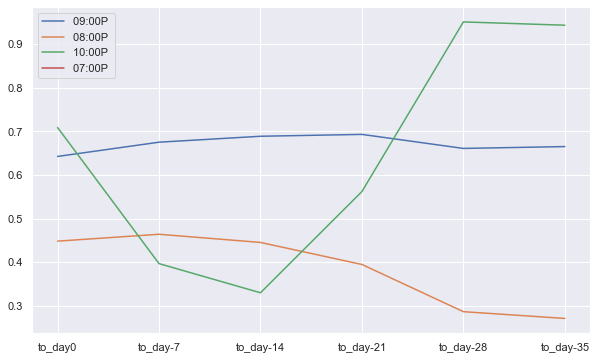

In [248]:
corr_list = []
for t in vdf.start_time.unique():
    corr_list.append(vdf[vdf.start_time == t].corr().loc['to_day0':'to_day-35','reach_p18-49_l3'])
    
pd.DataFrame(corr_list, index=vdf.start_time.unique()).transpose().plot();

## Modeling 

### Simple Linear Regression, to day 0

In [33]:
# Define Data
X = vdf['to_day0'].values.reshape(-1,1)
y = vdf['reach_p18-49_l3'].values.reshape(-1,1)

In [34]:
# Train, Test, Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
# Instansiate Model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [36]:
# Fit Model
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
print(linreg.intercept_)
print(linreg.coef_.flatten())

[2669.33924087]
[320.39153581]


In [38]:
# Predict
y_pred = linreg.predict(X_test)

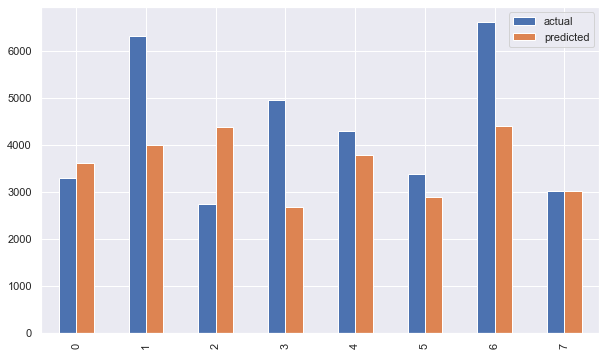

In [39]:
# Plot Differences
pd.DataFrame(zip(y_test.flatten(), y_pred.flatten()), columns=['actual','predicted']).plot(kind='bar');

In [40]:
# Evaluate Accuracy
import sklearn.metrics as metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1220.1319031845708
Mean Squared Error: 2323875.9778457712
Root Mean Squared Error: 1524.4264422548472


### Linear Regression with Cross Validation

In [286]:
from sklearn.model_selection import cross_val_score

In [287]:
X = vdf['to_day0'].values.reshape(-1,1)
y = vdf['reach_p18-49_l3'].values.reshape(-1,1)

In [299]:
# Instansiate Model
from sklearn.linear_model import LinearRegression
linreg2 = LinearRegression()

# K Fold Cross Validation
scores = cross_val_score(linreg2, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Fit Model
linreg2.fit(X_train, y_train)

# Predict
y_pred = linreg2.predict(X_test)

In [300]:
print(-scores.mean())

1740.9834843357469


In [314]:
k_range = range(2,31)
k_scores = []
for k in k_range:
    linreg3 = LinearRegression()
    scores = cross_val_score(linreg3, X, y, cv=k, scoring='neg_root_mean_squared_error')
    k_scores.append(-scores.mean())
print(k_scores)

[1739.7502634623052, 1752.3782010823115, 1767.1034800213774, 1740.9834843357469, 1782.6916881105706, 1738.9168495010947, 1759.7001934454124, 1798.1569558287324, 1732.4301058580313, 1750.964062170029, 1735.8187326425348, 1697.9286201602697, 1688.1125064022167, 1669.867150776438, 1693.763106009235, 1701.9567627480758, 1659.4683952176363, 1628.4450509379328, 1613.8383344237736, 1633.6373085409339, 1619.5910016551627, 1605.7131688345817, 1577.1973262225918, 1584.8254006969285, 1575.915717666387, 1605.935614551145, 1617.6160225467897, 1574.0044516268483, 1587.3934985070862]


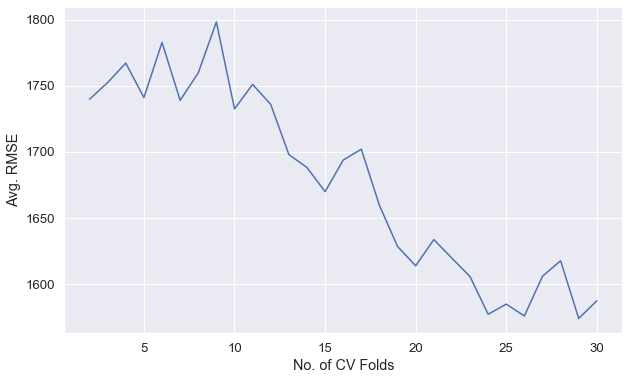

In [315]:
sns.set(font_scale=1.2)

plt.plot(k_range, k_scores)
plt.xlabel('No. of CV Folds')
plt.ylabel('Avg. RMSE');

### Lasso Linear Regression with Cross Validation

In [316]:
from sklearn.model_selection import cross_val_score

In [317]:
X = vdf['to_day0'].values.reshape(-1,1)
y = vdf['reach_p18-49_l3'].values.reshape(-1,1)

In [318]:
# Instansiate Model
from sklearn.linear_model import Lasso
lasso = Lasso()

# K Fold Cross Validation
scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Fit Model
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

In [319]:
print(-scores.mean())

1740.9583901406527


In [320]:
k_range = range(2,31)
k_scores = []
for k in k_range:
    lasso = Lasso()
    scores = cross_val_score(lasso, X, y, cv=k, scoring='neg_root_mean_squared_error')
    k_scores.append(-scores.mean())
print(k_scores)

[1739.7350144517716, 1752.3524865231618, 1767.0772927897265, 1740.9583901406527, 1782.6629102935467, 1738.9044918464238, 1759.688370235117, 1798.1546780502792, 1732.418556634435, 1750.9712538461788, 1735.8287147515991, 1697.9352734419663, 1688.1335636789483, 1669.8900142852135, 1693.7870643565284, 1701.987423051484, 1659.4970140554399, 1628.4601056501813, 1613.8598906980103, 1633.637531601787, 1619.6119597889572, 1605.7612645337736, 1577.2402153635333, 1584.8549727724217, 1575.9372628520157, 1605.9629185089498, 1617.64175288634, 1574.0368767146317, 1587.423426886009]


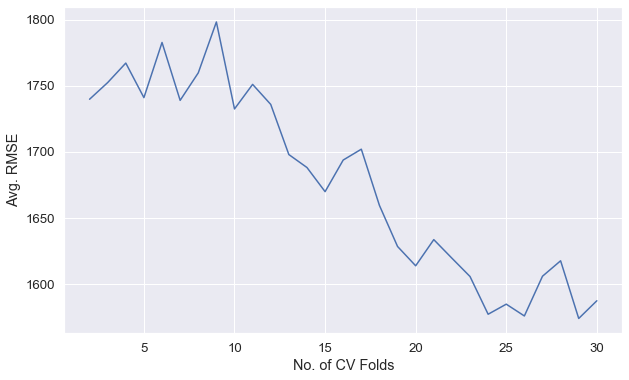

In [321]:
sns.set(font_scale=1.2)

plt.plot(k_range, k_scores)
plt.xlabel('No. of CV Folds')
plt.ylabel('Avg. RMSE');

#### Lasso with Normalization 

In [322]:
k_range = range(2,31)
k_scores = []
for k in k_range:
    lasso = Lasso(normalize=True)
    scores = cross_val_score(lasso, X, y, cv=k, scoring='neg_root_mean_squared_error')
    k_scores.append(-scores.mean())
print(k_scores)

[1739.5564318193015, 1752.0901094845813, 1766.8380352626564, 1740.5953198522898, 1782.2118115783348, 1738.7236232248285, 1759.4962537144759, 1798.108562732843, 1732.2181636058626, 1751.0227970386914, 1735.9540300699082, 1698.0014862065761, 1688.5467422791771, 1670.313990021821, 1694.2363757398462, 1702.574152765101, 1660.0454472409972, 1628.7547850133174, 1614.2862767956944, 1633.6349993854024, 1620.0296958093793, 1606.6778410764796, 1578.0543320534864, 1585.400663724963, 1576.3243527091506, 1606.4678328393677, 1618.1164417577377, 1574.6482847214552, 1587.985611933397]


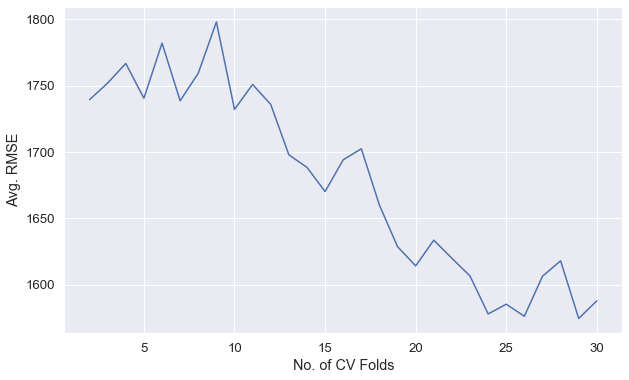

In [323]:
sns.set(font_scale=1.2)

plt.plot(k_range, k_scores)
plt.xlabel('No. of CV Folds')
plt.ylabel('Avg. RMSE');

No real difference with normalziations

## OLS different Windows

In [43]:
vdf.columns

Index(['network', 'show', 'nielsen_name', 'season', 'premiere', 'type',
       'start_time', 'episode_duration', 'genre', 'reach_p18-49_l3',
       'avg_audience_18-49_l3', 'to_day1', 'to_day0', 'to_day-7', 'to_day-14',
       'to_day-21', 'to_day-28', 'to_day-35'],
      dtype='object')

In [76]:
nvdf = vdf.drop(columns='genre').dropna()

In [44]:
windows = ['to_day0', 'to_day-7', 'to_day-14','to_day-21', 'to_day-28', 'to_day-35']

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [78]:
w_scores=[]

for w in windows:
    X = nvdf[w].values.reshape(-1,1)
    y = nvdf['reach_p18-49_l3'].values.reshape(-1,1)
    linreg4 = LinearRegression()
    scores = cross_val_score(linreg4, X, y, cv=5, scoring='neg_root_mean_squared_error')
    w_scores.append(-scores.mean())

In [79]:
print(w_scores)

[1769.513356810205, 1757.8230571189185, 1757.39648966466, 1767.711123444165, 1799.6631533595391, 1834.0628182220983]


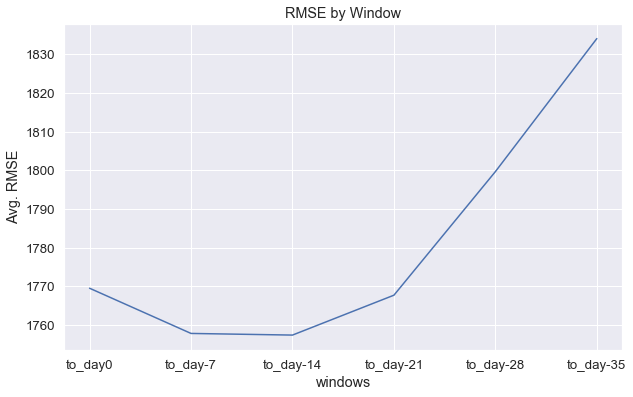

In [81]:
sns.set(font_scale=1.2)

plt.plot(windows, w_scores)
plt.xlabel('windows')
plt.ylabel('Avg. RMSE')
plt.title('RMSE by Window');

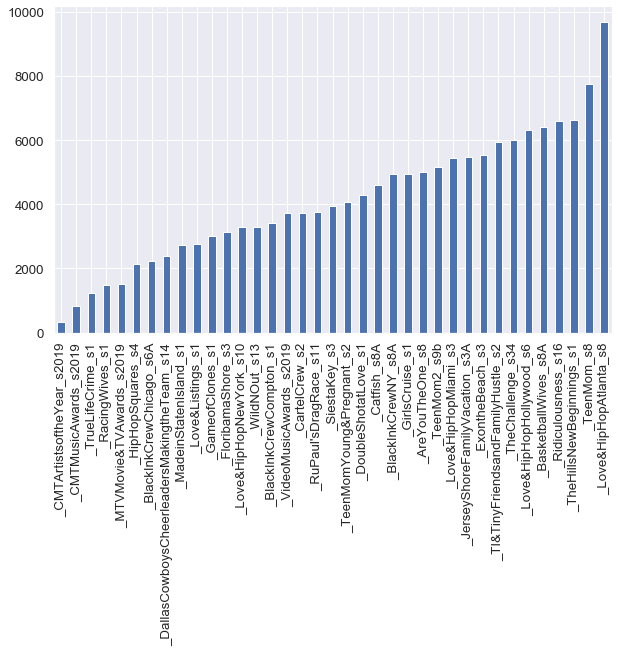

In [88]:
nvdf['reach_p18-49_l3'].sort_values().plot(kind='bar');

### Random Forrest Regressor

In [338]:
from sklearn.ensemble import RandomForestRegressor

In [339]:
X = vdf['to_day0'].values.reshape(-1,1)
y = vdf['reach_p18-49_l3'].values

In [340]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [341]:
print(regr.feature_importances_)

[1.]


In [318]:
# Instansiate Model
from sklearn.linear_model import Lasso
lasso = Lasso()

# K Fold Cross Validation
scores = cross_val_score(lasso, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Fit Model
lasso.fit(X_train, y_train)

# Predict
y_pred = lasso.predict(X_test)

### Nueral Network

https://medium.com/@srnghn/machine-learning-trying-to-predict-a-numerical-value-8aafb9ad4d36